# Notebook 3 for ISONE (winter) OSW + Solar Analysis
This notebook is designed to re-perform the analysis of winter months, this time with the addition of current solar resources.

It is largely the same as notebook 1, but additionally reads in the solar resource data from the ISONE website. The solar resource is then added to the wind and both are subtracted from the load profile to understand how renewables enable grid stability in winter months.

**To run, press the play buttons for each grey cell in order!**

**Part 1:**
To run this notebook as-is:


*   Navigate to the ISONE website: https://www.iso-ne.com/system-planning/planning-models-and-data/variable-energy-resource-data
*   Find the zip folder "**2023 ISO-NE Variable Energy Resource (VER) Data Series (2000-2022) Rev. 0**", download and unzip
*   Naviagate to the "wind" folder to find the file **2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv**
*   Navigate to the "load" folder to find the file **ISONE_grossload_metdata_spliced_23yr_EPT.csv**

*   Navigate to the "solar" folder to find the file **ISONE_solarcapacity_modeled_23yr_EPT.csv**







We will start with the OSW data in step 1 below.

In [ ]:
#Step 1: Upload the offshore wind file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv to 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv


In [ ]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.

import pandas as pd
df = pd.read_csv('2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())


      LZ        Date  Year  Month  Day  yr_day  yr_wk day_type     HE1  \
0  ISONE  01/01/2000  2000      1    1       1      0       WE  0.1182   
1  ISONE  01/02/2000  2000      1    2       2      1       WE  0.6034   
2  ISONE  01/03/2000  2000      1    3       3      1       WD  0.9358   
3  ISONE  01/04/2000  2000      1    4       4      1       WD  0.6101   
4  ISONE  01/05/2000  2000      1    5       5      1       WD  0.9231   

      HE2  ...    HE15    HE16    HE17    HE18    HE19    HE20    HE21  \
0  0.1128  ...  0.7474  0.8130  0.8483  0.8691  0.8735  0.8513  0.8644   
1  0.4819  ...  0.8502  0.8597  0.8855  0.9102  0.9183  0.9264  0.9357   
2  0.9369  ...  0.3960  0.3264  0.2228  0.1880  0.2142  0.2552  0.2616   
3  0.7262  ...  0.8515  0.7099  0.6723  0.6208  0.6287  0.5647  0.5804   
4  0.9075  ...  0.9225  0.9190  0.9028  0.8953  0.8761  0.8874  0.8830   

     HE22    HE23    HE24  
0  0.8359  0.7853  0.7326  
1  0.9347  0.9372  0.9372  
2  0.3077  0.3615  0.4225 

In [ ]:
#Step 4: Create a new dataframe, "wind_data" with just the information we want.

#First, change the "Date" column in the original dataframe to "datetime" format.
#The datetime format allows us to manipulate the dates easily: https://docs.python.org/3/library/datetime.html
df['Date'] = pd.to_datetime(df['Date'])

#Next, create a new dataframe named "wind_data" to copy over just the columns we want.
wind_data = pd.DataFrame()

#Then, copy over the date column, which we have already put in datetime format!
wind_data['Date'] = df['Date'].copy()

#Finally, sum together the CP for every hour of the wind data, then add that as a column to our new dataframe as "Net CP for Turbines".
wind_data['Net CP for Turbines'] = sum([df['HE1'], df['HE2'], df['HE3'], df['HE4'], df['HE5'],
                                        df['HE6'], df['HE7'], df['HE8'], df['HE9'], df['HE10'],
                                        df['HE11'], df['HE12'], df['HE13'], df['HE14'], df['HE15'],
                                        df['HE16'], df['HE17'], df['HE18'], df['HE19'], df['HE20'],
                                        df['HE21'], df['HE22'], df['HE23'], df['HE24']])

#We can print the new dataframe to make sure we have what we want!
print(wind_data)

           Date  Net CP for Turbines
0    2000-01-01              11.9738
1    2000-01-02              16.2638
2    2000-01-03              15.3354
3    2000-01-04              19.2895
4    2000-01-05              21.4297
...         ...                  ...
8396 2022-12-27              10.5740
8397 2022-12-28               9.0555
8398 2022-12-29              14.4821
8399 2022-12-30              14.4530
8400 2022-12-31              13.8022

[8401 rows x 2 columns]


**Part 2:** Read in and clean/format the load data!

In [ ]:
#Step 1: Upload the load file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving ISONE_grossload_metdata_spliced_23yr_EPT.csv to ISONE_grossload_metdata_spliced_23yr_EPT.csv


In [ ]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.
import pandas as pd
df = pd.read_csv('ISONE_grossload_metdata_spliced_23yr_EPT.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())

         Date  Hour_Ending  ISONE_grs_ld  ISONE_temp  ISONE_rh  ISONE_ghi  \
0  1999-12-31           20     13973.870       1.000    63.544        0.0   
1  1999-12-31           21     15327.421      -1.728    58.923        0.0   
2  1999-12-31           22     15840.597      -2.555    66.559        0.0   
3  1999-12-31           23     15095.283      -2.888    63.212        0.0   
4  1999-12-31           24     13747.394      -3.503    62.954        0.0   

   ISONE_10m_lz_wnd_spd  ISONE_onsw_wnd_spd  ISONE_ofsw_wnd_spd  
0                 1.528               7.405               4.824  
1                 1.883               7.995               4.924  
2                 2.344               7.448               5.243  
3                 2.734               7.123               5.406  
4                 2.997               6.831               5.574  


In [ ]:
#Step 4: Combine the grid load based on dates, sum the load for the same day!
#We will use the groupby() function, and group the rows by day, summing over load column.
#We will save this into a series, which will have the date as the index, and the load for each cummulative day as the value.
gl = df.groupby('Date')['ISONE_grs_ld'].sum()

#Now, create a new dataframe for the grid_load, similar to the wind_data from above.
grid_load = pd.DataFrame()

#Then, copy over the indexes (dates) and values (cummulative load) to the new data frame.
grid_load['Date'] = gl.index.copy()
grid_load['Load'] = gl.values.copy()

#Ensure the date is in datetime format!
grid_load['Date'] = pd.to_datetime(grid_load['Date'])

#Print to make sure you have the data in the correct format!
print(grid_load)

           Date        Load
0    1999-12-31   73984.565
1    2000-01-01  354832.061
2    2000-01-02  349242.490
3    2000-01-03  350583.444
4    2000-01-04  345941.275
...         ...         ...
8398 2022-12-28  350730.536
8399 2022-12-29  328251.077
8400 2022-12-30  304037.998
8401 2022-12-31  288181.831
8402 2023-01-01   11102.659

[8403 rows x 2 columns]


**Part 3:** Read in and clean/format the solar resource data.

In [ ]:
#Step 1: Upload the load file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving ISONE_solarcapacity_modeled_23yr_EPT.csv to ISONE_solarcapacity_modeled_23yr_EPT.csv


In [ ]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.
import pandas as pd
df = pd.read_csv('ISONE_solarcapacity_modeled_23yr_EPT.csv', skiprows=1)

#Read in the solar capacity that the CP values are based on.
capacity = pd.read_csv('ISONE_solarcapacity_modeled_23yr_EPT.csv', nrows=0).columns[2] #in MW
print(capacity)

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())

11912.58
         Date  Hour_Ending  ISONE_pv_pwr
0  1999-12-31           20           0.0
1  1999-12-31           21           0.0
2  1999-12-31           22           0.0
3  1999-12-31           23           0.0
4  1999-12-31           24           0.0


In [ ]:
#Step 4: Combine the solar supply capacity factors based on dates, sum the solar supply for the same day!
#We will use the groupby() function, and group the rows by day, summing over the power column.
#We will save this into a series, which will have the date as the index, and the supply for each cummulative day as the value.
pv = df.groupby('Date')['ISONE_pv_pwr'].sum()

#Now, create a new dataframe for the pv power, similar to the grid_load from above.
pv_power = pd.DataFrame()

#Then, copy over the indexes (dates) and values (solar CP sums) to the new data frame.
pv_power['Date'] = pv.index.copy()
pv_power['Solar Power'] = pv.values.copy() * float(capacity) #Gives total MW at each timestamp

#Ensure the date is in datetime format!
pv_power['Date'] = pd.to_datetime(pv_power['Date'])

#Print to make sure you have the data in the correct format!
print(pv_power)


           Date   Solar Power
0    1999-12-31      0.000000
1    2000-01-01  20361.732229
2    2000-01-02   7144.188652
3    2000-01-03  10347.255075
4    2000-01-04   2352.210396
...         ...           ...
8398 2022-12-28  16659.481053
8399 2022-12-29  26407.509530
8400 2022-12-30  25915.662926
8401 2022-12-31   3821.889216
8402 2023-01-01      0.000000

[8403 rows x 2 columns]


**Part 4:** Combine our 3 new dataframes so that they share a date column.

In [ ]:
#Step 1: Use the merge function, provided by Pandas, to combine the three dataframes in two steps.
wind_solar_load_data = pd.merge(grid_load, wind_data, on = "Date", how = "left")
wind_solar_load_data = pd.merge(wind_solar_load_data, pv_power, on = "Date", how = "left")
#Print to ensure we have gotten it right!
print(wind_solar_load_data)

           Date        Load  Net CP for Turbines   Solar Power
0    1999-12-31   73984.565                  NaN      0.000000
1    2000-01-01  354832.061              11.9738  20361.732229
2    2000-01-02  349242.490              16.2638   7144.188652
3    2000-01-03  350583.444              15.3354  10347.255075
4    2000-01-04  345941.275              19.2895   2352.210396
...         ...         ...                  ...           ...
8398 2022-12-28  350730.536               9.0555  16659.481053
8399 2022-12-29  328251.077              14.4821  26407.509530
8400 2022-12-30  304037.998              14.4530  25915.662926
8401 2022-12-31  288181.831              13.8022   3821.889216
8402 2023-01-01   11102.659                  NaN      0.000000

[8403 rows x 4 columns]


**Part 5:** Select which year and months on which to perform analysis!

In [ ]:
#Step 1: Choose the two winter years you want to focus on.
winter_year_one = 2021 #Dec year!
winter_year_two = 2022 #Jan + Feb year!

#Step 2: Select a year and 3 months that we want to look at for the analysis.
analysis_data = wind_solar_load_data.loc[((wind_solar_load_data['Date'].dt.year == winter_year_one) & (wind_solar_load_data['Date'].dt.month == 12)) | ((wind_solar_load_data['Date'].dt.year == winter_year_two) & ((wind_solar_load_data['Date'].dt.month == 1) | (wind_solar_load_data['Date'].dt.month == 2)))]

#By printing, we can see that it has only pulled out these rows!
print(analysis_data)

           Date        Load  Net CP for Turbines   Solar Power
8006 2021-12-01  334517.947               9.9793  20882.228586
8007 2021-12-02  324667.943              17.2016  12007.797252
8008 2021-12-03  325541.509              20.9622  27099.689990
8009 2021-12-04  322883.937               6.8030  19686.098341
8010 2021-12-05  311559.593               5.4686  23965.359154
...         ...         ...                  ...           ...
8091 2022-02-24  351233.043               8.5135  13756.933286
8092 2022-02-25  360815.442              15.7106   9256.741764
8093 2022-02-26  342560.739               7.9260  23762.082889
8094 2022-02-27  328842.694              18.3442  42069.645560
8095 2022-02-28  359428.934              15.2274  48200.550158

[90 rows x 4 columns]


**Part 6:** Add in different total turbine installation capacities to determine the potential generation from various NE OSW projects. Subtract different turbine capacities as well as the calculated solar capacity from the load.

In [ ]:
#Step 1: Add different turbine capacities.
analysis_data['Load - 1500MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 1500)
analysis_data['Load - 4000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 4000)
analysis_data['Load - 8000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 8000)

analysis_data["Load - 1500MW Turbine - Solar"] = analysis_data["Load - 1500MW Turbine"] - analysis_data["Solar Power"]
analysis_data["Load - 4000MW Turbine - Solar"] = analysis_data["Load - 4000MW Turbine"] - analysis_data["Solar Power"]
analysis_data["Load - 8000MW Turbine - Solar"] = analysis_data["Load - 8000MW Turbine"] - analysis_data["Solar Power"]

#Step 2: Remove the old net capacity column as we no longer need it.
analysis_data = analysis_data.drop(columns = ['Net CP for Turbines'])
analysis_data = analysis_data.drop(columns = ['Solar Power'])

#Step 3: Print to make sure we have the right data!
print(analysis_data)

#You can safely ignore any warnings about "a value trying to be set on a copy of a slice".

           Date        Load  Load - 1500MW Turbine  Load - 4000MW Turbine  \
8006 2021-12-01  334517.947             319548.997             294600.747   
8007 2021-12-02  324667.943             298865.543             255861.543   
8008 2021-12-03  325541.509             294098.209             241692.709   
8009 2021-12-04  322883.937             312679.437             295671.937   
8010 2021-12-05  311559.593             303356.693             289685.193   
...         ...         ...                    ...                    ...   
8091 2022-02-24  351233.043             338462.793             317179.043   
8092 2022-02-25  360815.442             337249.542             297973.042   
8093 2022-02-26  342560.739             330671.739             310856.739   
8094 2022-02-27  328842.694             301326.394             255465.894   
8095 2022-02-28  359428.934             336587.834             298519.334   

      Load - 8000MW Turbine  Load - 1500MW Turbine - Solar  \
8006         

<ipython-input-12-1efeb6f6c2bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['Load - 1500MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 1500)
<ipython-input-12-1efeb6f6c2bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['Load - 4000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 4000)
<ipython-input-12-1efeb6f6c2bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

**Part 7:** Plot the data!

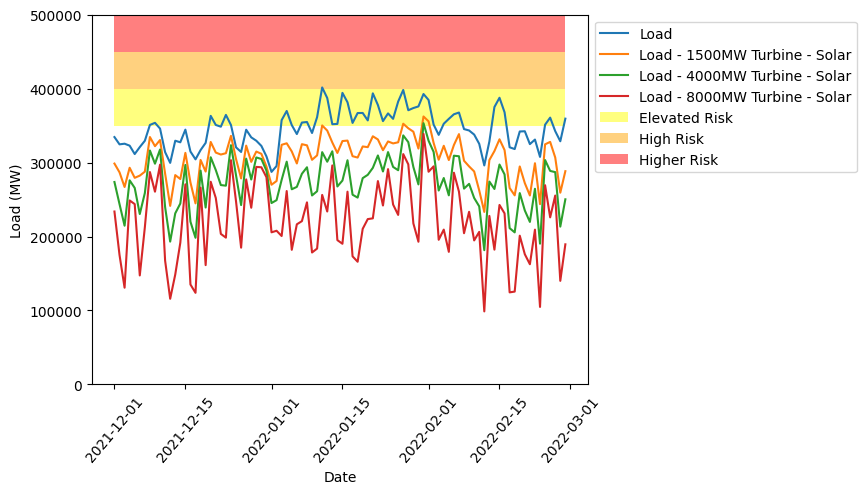

In [ ]:
#Step 1: Import matplotlib as the plotting tool to use!
import matplotlib.pyplot as plt

#Step 2: Define a figure and axis.
fig, ax = plt.subplots()

#Step 3: Plot the data! Here we have the date on the x axis, with load on the y-axis.
ax.plot(analysis_data['Date'], analysis_data['Load'], label = 'Load')
ax.plot(analysis_data['Date'], analysis_data['Load - 1500MW Turbine - Solar'], label = 'Load - 1500MW Turbine - Solar')
ax.plot(analysis_data['Date'], analysis_data['Load - 4000MW Turbine - Solar'], label = 'Load - 4000MW Turbine - Solar')
ax.plot(analysis_data['Date'], analysis_data['Load - 8000MW Turbine - Solar'], label = 'Load - 8000MW Turbine - Solar')

#Step 4: Label the both the x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Load (MW)')

#Step 5: Set the x and y axis limits.
ax.set_ylim(ymin=0, ymax=500000)

#Step 6: Rotate the x axis time labels for better fit within the figure.
plt.xticks(rotation=50)

#Step 7: Define the risk regions.
plt.fill_between(analysis_data['Date'], 350000, 400000, color='yellow', alpha=0.5, linewidth = 0.0, label='Elevated Risk')
plt.fill_between(analysis_data['Date'], 400000, 450000, color='orange', alpha=0.5, linewidth = 0.0, label='High Risk')
plt.fill_between(analysis_data['Date'], 450000, 500000, color='red', alpha=0.5, linewidth = 0.0, label='Higher Risk')

#Step 8: Create the legend and show the plot!
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
#Step 9.1: Print the number of days with elevated risk
print("Days of Elevated Risk or greater with no turbines: ", analysis_data[(analysis_data["Load"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 1500 MW of turbines and current solar capacity: ", analysis_data[(analysis_data["Load - 1500MW Turbine - Solar"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 4000 MW of turbines and current solar capacity: ", analysis_data[(analysis_data["Load - 4000MW Turbine - Solar"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 8000 MW of turbines and current solar capacity: ", analysis_data[(analysis_data["Load - 8000MW Turbine - Solar"] > 350000)].shape[0])

Days of Elevated Risk or greater with no turbines:  45
Days of Elevated Risk or greater with 1500 MW of turbines and current solar capacity:  4
Days of Elevated Risk or greater with 4000 MW of turbines and current solar capacity:  1
Days of Elevated Risk or greater with 8000 MW of turbines and current solar capacity:  0


**Part 8:** Loop over all potential years to determine average number of days with elevated risk and plot this data!

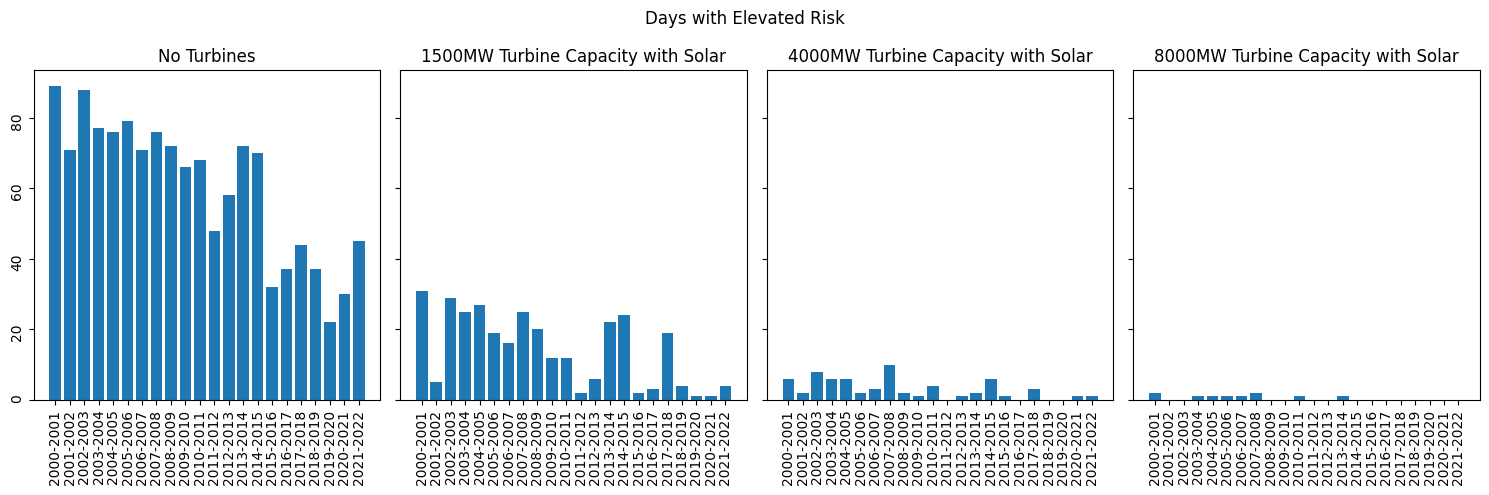

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Step 1: Create a dataframe for the elevated risk data.
elevated_risk = pd.DataFrame(columns=['Year Range', 'No Turbines', '1500MW Turbine Capacity + Installed Solar', '4000 MW Turbine Capacity + Installed Solar', '8000 MW Turbine Capacity + Installed Solar'])

years_min=2000
years_max = 2022

i = years_min
while i < years_max:
  winter_year_one = i
  winter_year_two = i+1
  analysis_data = wind_solar_load_data.loc[((wind_solar_load_data['Date'].dt.year == winter_year_one) & (wind_solar_load_data['Date'].dt.month == 12)) | ((wind_solar_load_data['Date'].dt.year == winter_year_two) & ((wind_solar_load_data['Date'].dt.month == 1) | (wind_solar_load_data['Date'].dt.month == 2)))]
  analysis_data['Load - 1500MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 1500)
  analysis_data['Load - 4000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 4000)
  analysis_data['Load - 8000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 8000)
  analysis_data["Load - 1500MW Turbine - Solar"] = analysis_data["Load - 1500MW Turbine"] - analysis_data["Solar Power"]
  analysis_data["Load - 4000MW Turbine - Solar"] = analysis_data["Load - 4000MW Turbine"] - analysis_data["Solar Power"]
  analysis_data["Load - 8000MW Turbine - Solar"] = analysis_data["Load - 8000MW Turbine"] - analysis_data["Solar Power"]
  analysis_data = analysis_data.drop(columns = ['Net CP for Turbines'])
  analysis_data = analysis_data.drop(columns = ['Solar Power'])
  elevated_risk.loc[i - years_min] = [str(winter_year_one)+"-"+str(winter_year_two), analysis_data[analysis_data["Load"] > 350000].shape[0], analysis_data[(analysis_data["Load - 1500MW Turbine - Solar"] > 350000)].shape[0], analysis_data[(analysis_data["Load - 4000MW Turbine - Solar"] > 350000)].shape[0], analysis_data[analysis_data["Load - 8000MW Turbine - Solar"] > 350000].shape[0]]
  i+=1


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
axes[0].bar(elevated_risk['Year Range'], elevated_risk['No Turbines'], label='Days of Elevated Risk without Turbines')
axes[1].bar(elevated_risk['Year Range'], elevated_risk['1500MW Turbine Capacity + Installed Solar'], label='Days of Elevated Risk with 1500MW of Turbine Capacity and Installed Solar')
axes[2].bar(elevated_risk['Year Range'], elevated_risk['4000 MW Turbine Capacity + Installed Solar'], label='Days of Elevated Risk with 4000MW of Turbine Capacity and Installed Solar')
axes[3].bar(elevated_risk['Year Range'], elevated_risk['8000 MW Turbine Capacity + Installed Solar'], label='Days of Elevated Risk with 8000MW of Turbine Capacity and Installed Solar')

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)

plt.suptitle("Days with Elevated Risk")
axes[0].set_title('No Turbines')
axes[1].set_title('1500MW Turbine Capacity with Solar')
axes[2].set_title('4000MW Turbine Capacity with Solar')
axes[3].set_title('8000MW Turbine Capacity with Solar')

plt.tight_layout()
plt.show()